In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:

FILE_NAME_21 = 'dataset_csv_file/train_subway21.csv'
FILE_NAME_22 = 'dataset_csv_file/train_subway22.csv'
FILE_NAME_23 = 'dataset_csv_file/train_subway23.csv'

train_subway21_df = pd.read_csv(FILE_NAME_21)
train_subway22_df = pd.read_csv(FILE_NAME_22)
train_subway23_df = pd.read_csv(FILE_NAME_23)


In [ ]:
train_subway21_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway22_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway23_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']

In [ ]:
train_subway_df = train_subway21_df.copy()
train_subway_df = pd.concat([train_subway_df, train_subway22_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848338,2022123119,8,2828,남위례,하선,572,-1.6,199.0,0.2,0.0,0.0,67.7,-99.0,-2.1,19
10848339,2022123120,8,2828,남위례,하선,572,-2.6,0.0,0.0,0.0,0.0,73.7,-99.0,-3.2,16
10848340,2022123121,8,2828,남위례,하선,572,-2.9,17.0,0.0,0.0,0.0,75.1,-99.0,-3.7,21
10848341,2022123122,8,2828,남위례,하선,572,-3.1,185.3,0.1,0.0,0.0,75.7,-99.0,-3.9,20


In [ ]:
train_subway_df = pd.concat([train_subway_df, train_subway23_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


추가 결측치 처리

In [ ]:
# 추가 결측치 반영 
# 풍향 변수 -9.9 -> 결측치

none_index = train_subway_df[train_subway_df['WD']==-9.9].index
train_subway_df.loc[none_index, 'WD'] = -99.0

In [7]:
train_subway_df[train_subway_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


In [8]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


 ### 결측치 처리

In [9]:
train_subway_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [10]:
for column in train_subway_df.columns:

    none_index = train_subway_df[train_subway_df[column]==-99.0].index
    train_subway_df.loc[none_index, column] =  None

In [11]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

### 데이터 확인

In [12]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,NaN,NaN,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,NaN,NaN,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,NaN,NaN,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,NaN,NaN,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,NaN,NaN,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,NaN,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,NaN,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,NaN,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,NaN,-1.3,18


1. 결측치 제거 후 이상치 확인 

In [13]:
train_subway_dropna_df = train_subway_df.dropna()
train_subway_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [14]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

Congestion 추가 이상치 확인

In [42]:
# 남위례 Congestion 0 제거 

zero_index =train_subway_dropna_df[(train_subway_dropna_df['station_name']=='남위례') & (train_subway_dropna_df['Congestion']==0)].index
train_subway_dropna_0_df = train_subway_dropna_df.drop(zero_index)
train_subway_dropna_0_df.reset_index(inplace=True, drop=True)
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


### 데이터 전처리 

파생변수 생성

In [ ]:
# 파생변수 'hour' 생성
train_subway_dropna_0_df['hour'] = train_subway_dropna_0_df['TM']%100

train_subway_dropna_0_df

In [ ]:
# 파생변수 'is_peak_hour' 생성
# 출퇴근 시간 구분
train_subway_dropna_0_df['is_peak_hour'] = train_subway_dropna_0_df['hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

추가 데이터 행 제거
- Congestion 0

In [ ]:
# 혼잡도 0 제거 
train_subway_dropna_0_df_delete_0 = train_subway_dropna_0_df[train_subway_dropna_0_df['Congestion']!=0]
train_subway_dropna_0_df_delete_0.reset_index(drop=True, inplace=True)

In [16]:
train_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TM              int64  
 1   Line            int64  
 2   station_number  int64  
 3   station_name    object 
 4   Direction       object 
 5   STN             int64  
 6   TA              float64
 7   WD              float64
 8   WS              float64
 9   RN_DAY          float64
 10  RN_HR1          float64
 11  HM              float64
 12  SI              float64
 13  ta_chi          float64
 14  Congestion      int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB


---

### train, test 정의

In [ ]:
# train 정의
x_train = train_subway_dropna_0_df_delete_0.drop(['TM','Line','station_name','station_number','Direction','Congestion'], axis=1)
y_train = train_subway_dropna_0_df_delete_0['Congestion']

print(x_train.shape, y_train.shape)

(9122469, 11) (9122469,)


In [6]:
x_train.head(5)

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour
0,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,20,0
1,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,6,0
2,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,7,1
3,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,8,1
4,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,9,1


In [7]:
y_train.head(5)

0    10
1    14
2    32
3    48
4    34
Name: Congestion, dtype: int64

In [ ]:
# test 정의
TEST_FILE_NAME = 'dataset_csv_file/test_subway.csv'

test_subway_df = pd.read_csv(TEST_FILE_NAME, encoding="cp949")

In [9]:
test_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2024010100,1,150,서울역,상선,419,0.6,161.4,2.7,4.5,0.0,99.0,-99.0,-0.3,NaN
1,2024010101,1,150,서울역,상선,419,0.0,145.7,3.8,0.0,0.0,99.4,-99.0,-2.2,NaN
2,2024010102,1,150,서울역,상선,419,0.3,171.3,3.1,0.0,0.0,99.6,-99.0,-2.3,NaN
3,2024010105,1,150,서울역,상선,419,-0.1,176.0,3.0,0.0,0.0,98.1,-99.0,-0.1,NaN
4,2024010106,1,150,서울역,상선,419,-0.6,174.4,3.9,0.0,0.0,99.0,-99.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834747,2024123119,8,2828,남위례,하선,572,-0.2,255.7,0.2,0.0,0.0,35.1,-99.0,0.0,NaN
5834748,2024123120,8,2828,남위례,하선,572,0.0,251.6,0.2,0.0,0.0,35.1,-99.0,-0.4,NaN
5834749,2024123121,8,2828,남위례,하선,572,-2.0,0.0,0.0,0.0,0.0,41.6,-99.0,-1.7,NaN
5834750,2024123122,8,2828,남위례,하선,572,-3.0,0.0,0.0,0.0,0.0,46.0,-99.0,-2.6,NaN


In [ ]:
# test에 파생변수 생성
test_subway_df['hour'] = test_subway_df['TM']%100

# 출퇴근 시간 구분
test_subway_df['is_peak_hour'] = test_subway_df['hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

In [11]:
test_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,hour,is_peak_hour
0,2024010100,1,150,서울역,상선,419,0.6,161.4,2.7,4.5,0.0,99.0,-99.0,-0.3,NaN,0,0
1,2024010101,1,150,서울역,상선,419,0.0,145.7,3.8,0.0,0.0,99.4,-99.0,-2.2,NaN,1,0
2,2024010102,1,150,서울역,상선,419,0.3,171.3,3.1,0.0,0.0,99.6,-99.0,-2.3,NaN,2,0
3,2024010105,1,150,서울역,상선,419,-0.1,176.0,3.0,0.0,0.0,98.1,-99.0,-0.1,NaN,5,0
4,2024010106,1,150,서울역,상선,419,-0.6,174.4,3.9,0.0,0.0,99.0,-99.0,0.0,NaN,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834747,2024123119,8,2828,남위례,하선,572,-0.2,255.7,0.2,0.0,0.0,35.1,-99.0,0.0,NaN,19,1
5834748,2024123120,8,2828,남위례,하선,572,0.0,251.6,0.2,0.0,0.0,35.1,-99.0,-0.4,NaN,20,0
5834749,2024123121,8,2828,남위례,하선,572,-2.0,0.0,0.0,0.0,0.0,41.6,-99.0,-1.7,NaN,21,0
5834750,2024123122,8,2828,남위례,하선,572,-3.0,0.0,0.0,0.0,0.0,46.0,-99.0,-2.6,NaN,22,0


In [12]:
x_test = test_subway_df.drop(['TM','Line','station_name','station_number','Direction','Congestion'], axis=1)
y_test = test_subway_df['Congestion']

In [13]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (9122469, 11), y_train : (9122469,)
x_test : (5834752, 11) , y_test : (5834752,)


STN 라벨 인코딩

In [14]:
print("x_train['STN'] 고유값 수:", x_train['STN'].nunique())
print("x_test['STN'] 고유값 수:", x_test['STN'].nunique())

print("train에 있는 STN 값 일부:", x_train['STN'].unique()[:5])
print("test에 있는 STN 값 일부:", x_test['STN'].unique()[:5])

# 겹치는 값 비율 확인
common = set(x_train['STN']) & set(x_test['STN'])
print("train과 test에서 겹치는 STN 개수:", len(common))


x_train['STN'] 고유값 수: 50
x_test['STN'] 고유값 수: 51
train에 있는 STN 값 일부: [419 108 408 415 418]
test에 있는 STN 값 일부: [419 108 408 415 418]
train과 test에서 겹치는 STN 개수: 50


In [15]:
print(x_train['STN'].dtype, x_test['STN'].dtype)

int64 int64


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(x_train['STN'])

# transform 할 수 있는 값인지 확인 후 처리
def safe_label_transform(encoder, values):
    known_classes = set(encoder.classes_)
    return [encoder.transform([v])[0] if v in known_classes else -1 for v in values]

x_train['STN_ENC'] = encoder.transform(x_train['STN'])
x_test['STN_ENC'] = safe_label_transform(encoder, x_test['STN'])


In [17]:
x_train

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour,STN_ENC
0,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,20,0,20
1,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,6,0,20
2,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,7,1,20
3,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,8,1,20
4,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,9,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9122464,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,14,0,45
9122465,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,15,0,45
9122466,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16,0,45
9122467,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,17,1,45


In [18]:
x_test['STN_ENC'].unique()

array([20,  1, 11, 18, 19, 39, 10,  9, 31, 22, 28, 47,  3, 40, 27,  6,  5,
        0, 38, 36, 48, 37, 21, 16,  7, 49, 24, 13, 14, 25, 41, 15, 34, 35,
       42, 23, 17, 46, 29, 32,  4, 43, 30, 44,  2,  8, 26, 33, 12, -1, 45])

스케일링 

In [19]:
# feature 스케일링 
# MinMaxScaler 사용 

numeric_col = ['TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','hour']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train[numeric_col] = scaler.fit_transform(x_train[numeric_col])
x_train_scaled = pd.DataFrame(x_train, columns=x_train.columns)

x_test[numeric_col]= scaler.transform(x_test[numeric_col])
x_test_scaled = pd.DataFrame(x_test, columns=x_test.columns)

In [20]:
x_train_scaled.head(5)

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour,STN_ENC
0,419,0.861111,0.800278,0.054688,0.0,0.0,0.537917,0.021220,0.883573,0.869565,0,20
1,419,0.787037,0.468611,0.062500,0.0,0.0,0.732053,0.005305,0.835726,0.260870,0,20
2,419,0.805556,0.435833,0.117188,0.0,0.0,0.713852,0.106101,0.854864,0.304348,1,20
3,419,0.816358,0.450278,0.125000,0.0,0.0,0.667341,0.262599,0.880383,0.347826,1,20
4,419,0.822531,0.404444,0.156250,0.0,0.0,0.655207,0.453581,0.897927,0.391304,1,20


In [21]:
x_test_scaled.head(5)

,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour,STN_ENC
0,419,0.398148,0.448333,0.210938,0.01833,0.0,0.989889,-26.259947,0.397129,0.000000,0,20
1,419,0.388889,0.404722,0.296875,0.00000,0.0,0.993933,-26.259947,0.366826,0.043478,0,20
2,419,0.393519,0.475833,0.242188,0.00000,0.0,0.995956,-26.259947,0.365231,0.086957,0,20
3,419,0.387346,0.488889,0.234375,0.00000,0.0,0.980789,-26.259947,0.400319,0.217391,0,20
4,419,0.379630,0.484444,0.304688,0.00000,0.0,0.989889,-26.259947,0.401914,0.260870,0,20


필요없는 변수 'STN' 제거

In [ ]:
# 인코딩 전 STN 컬럼 삭제
x_train_scaled = x_train_scaled.drop('STN', axis=1)
x_train_scaled

,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour,STN_ENC
0,0.861111,0.800278,0.054688,0.000000,0.0,0.537917,0.021220,0.883573,0.869565,0,20
1,0.787037,0.468611,0.062500,0.000000,0.0,0.732053,0.005305,0.835726,0.260870,0,20
2,0.805556,0.435833,0.117188,0.000000,0.0,0.713852,0.106101,0.854864,0.304348,1,20
3,0.816358,0.450278,0.125000,0.000000,0.0,0.667341,0.262599,0.880383,0.347826,1,20
4,0.822531,0.404444,0.156250,0.000000,0.0,0.655207,0.453581,0.897927,0.391304,1,20
...,...,...,...,...,...,...,...,...,...,...,...
9122464,0.435185,0.850000,0.085938,0.028513,0.0,0.755308,0.047745,0.444976,0.608696,0,45
9122465,0.445988,0.068611,0.093750,0.028513,0.0,0.726997,0.172414,0.457735,0.652174,0,45
9122466,0.453704,0.019444,0.054688,0.028513,0.0,0.711830,0.175066,0.462520,0.695652,0,45
9122467,0.445988,0.842778,0.015625,0.028513,0.0,0.722952,0.068966,0.456140,0.739130,1,45


In [ ]:
# 인코딩 전 STN 컬럼 삭제
x_test_scaled = x_test_scaled.drop('STN', axis=1)
x_test_scaled

,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,hour,is_peak_hour,STN_ENC
0,0.398148,0.448333,0.210938,0.01833,0.0,0.989889,-26.259947,0.397129,0.000000,0,20
1,0.388889,0.404722,0.296875,0.00000,0.0,0.993933,-26.259947,0.366826,0.043478,0,20
2,0.393519,0.475833,0.242188,0.00000,0.0,0.995956,-26.259947,0.365231,0.086957,0,20
3,0.387346,0.488889,0.234375,0.00000,0.0,0.980789,-26.259947,0.400319,0.217391,0,20
4,0.379630,0.484444,0.304688,0.00000,0.0,0.989889,-26.259947,0.401914,0.260870,0,20
...,...,...,...,...,...,...,...,...,...,...,...
5834747,0.385802,0.710278,0.015625,0.00000,0.0,0.343782,-26.259947,0.401914,0.826087,1,45
5834748,0.388889,0.698889,0.015625,0.00000,0.0,0.343782,-26.259947,0.395534,0.869565,0,45
5834749,0.358025,0.000000,0.000000,0.00000,0.0,0.409505,-26.259947,0.374801,0.913043,0,45
5834750,0.342593,0.000000,0.000000,0.00000,0.0,0.453994,-26.259947,0.360447,0.956522,0,45


In [24]:
print(x_train_scaled.shape, x_test_scaled.shape)

(9122469, 11) (5834752, 11)


### 모델 학습 및 훈련 

In [56]:
import xgboost

In [57]:
xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate = 0.2, device="cuda", random_state = 3)
xgb_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# GPU 기반 예측
y_train_pred = xgb_model.predict(x_train_scaled).astype(int)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

c:\Users\sh321\anaconda3\envs\weather_subway_preprocessing_39_1\lib\site-packages\xgboost\core.py:158: UserWarning: [23:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Train RMSE: 15.3757
Train R²: 0.3918


In [59]:
y_train.describe()

count    9.122469e+06
mean     2.746106e+01
std      1.971634e+01
min      1.000000e+00
25%      1.400000e+01
50%      2.300000e+01
75%      3.500000e+01
max      2.890000e+02
Name: Congestion, dtype: float64

In [61]:
import json

booster = xgb_model.get_booster()
tree_json_list = booster.get_dump(dump_format='json')

def get_depth(node):
    if 'children' not in node:
        return 1
    return 1 + max(get_depth(child) for child in node['children'])

depths = []

for tree_json in tree_json_list:
    tree_dict = json.loads(tree_json)
    depths.append(get_depth(tree_dict))


# 통계 출력
print(f"트리 개수: {len(depths)}")
print(f"평균 깊이: {sum(depths)/len(depths):.2f}")
print(f"최대 깊이: {max(depths)}")
print(f"최소 깊이: {min(depths)}")


트리 개수: 1000
평균 깊이: 7.00
최대 깊이: 7
최소 깊이: 7


In [62]:
print(f'feature_names_in_ : {xgb_model.feature_names_in_}')
print(f'n_features_in_ : {xgb_model.n_features_in_}개')
print(f'feature_importances_ : {xgb_model.feature_importances_}')

feature_names_in_ : ['TA' 'WD' 'WS' 'RN_DAY' 'RN_HR1' 'HM' 'SI' 'ta_chi' 'hour' 'is_peak_hour'
 'STN_ENC']
n_features_in_ : 11개
feature_importances_ : [0.01316856 0.00992796 0.00866083 0.01859166 0.01142316 0.0155548
 0.02346705 0.02106952 0.07943013 0.4575051  0.34120122]


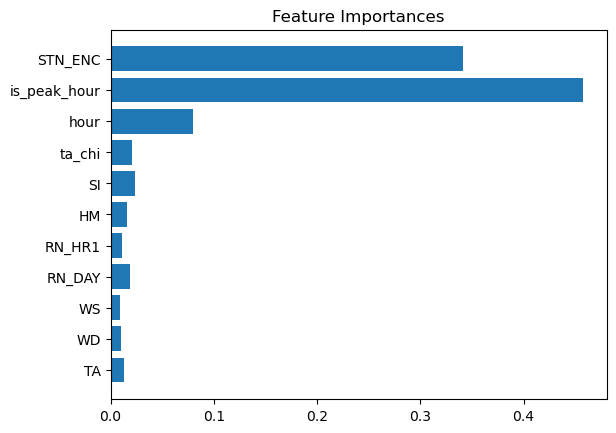

In [63]:
plt.barh(range(xgb_model.n_features_in_), xgb_model.feature_importances_)
plt.yticks(range(xgb_model.n_features_in_), xgb_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

### 모델 튜닝

In [25]:
x_train_scaled = x_train_scaled.astype('float32')
y_train = y_train.astype('float32')

In [26]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
params_1 = {
    'max_depth': range(7, 11),
    'learning_rate': [0.2],
    'min_child_weight': range(1, 6),
    'gamma': range(0, 5)
}


In [ ]:
xgb_model_1 = xgboost.XGBRegressor(n_estimators=250, random_state=33,device="cuda", tree_method="hist", verbosity=2)

In [37]:
scoring_cv = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

In [ ]:
# RMSE scorer (음수화)
searcv_cv_1 = GridSearchCV(xgb_model_1, param_grid=params_1, scoring = scoring_cv, 
                        refit='rmse',cv=3, verbose=4, return_train_score=True, n_jobs=1)

In [ ]:
searcv_cv_1.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=1, subsample=1; r2: (train=0.367, test=0.360) rmse: (train=-15.681, test=-15.778) total time=  15.5s
[CV 2/3] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=1, subsample=1; r2: (train=0.368, test=0.361) rmse: (train=-15.671, test=-15.746) total time=  15.2s
[CV 3/3] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=1, subsample=1; r2: (train=0.368, test=0.362) rmse: (train=-15.667, test=-15.746) total time=  15.5s
[CV 1/3] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=2, subsample=1; r2: (train=0.368, test=0.361) rmse: (train=-15.673, test=-15.768) total time=  15.8s
[CV 2/3] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=2, subsample=1; r2: (train=0.369, test=0.362) rmse: (train=-15.660, test=-15.7

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    multi_strategy=None, n_estimators=250,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=33, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [1], 'gamma': range(0, 5),
                         'learning_rate': [0.2], 'max_depth': range(7, 11),
                         'min_child_weight': range(1, 6), 'subsample': [1]},
             refit='rmse', return_train_score=True,
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=4)

In [ ]:
print(f'[searcv_cv_1.best_score_] {searcv_cv_1.best_score_}')
print(f'[searcv_cv_1.best_param] {searcv_cv_1.best_params_}')
print(f'[searcv_cv_1.best_estimator_] {searcv_cv_1.best_estimator_}')

[searcv_cv.best_score_] -15.061563491821289
[searcv_cv.best_param] {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1}
[searcv_cv.best_estimator_] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)


In [ ]:

best_model_1 = searcv_cv_1.best_estimator_

y_train_pred = best_model_1.predict(x_train_scaled).astype(int)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

In [66]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
params_2 = {
    'max_depth': range(10, 15),
    'learning_rate': [0.2],
    'min_child_weight': [1],
    'gamma': [0]
}


In [69]:
xgb_model_2 = xgboost.XGBRegressor(n_estimators=250, random_state=33,device="cuda", tree_method="hist", verbosity=2)

In [30]:
scoring_cv = {
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

In [71]:
# RMSE scorer (음수화)
searcv_cv_2 = GridSearchCV(xgb_model_2, param_grid=params_2, scoring = scoring_cv, 
                        refit='rmse',cv=3, verbose=4, return_train_score=True, n_jobs=1)

In [72]:
searcv_cv_2.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=1; r2: (train=0.456, test=0.113) rmse: (train=-15.134, test=-16.345) total time=  25.3s
[CV 2/3] END gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=1; r2: (train=0.456, test=0.306) rmse: (train=-14.770, test=-15.880) total time=  27.1s
[CV 3/3] END gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=1; r2: (train=0.445, test=0.241) rmse: (train=-13.638, test=-18.835) total time=  27.6s
[CV 1/3] END gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=1; r2: (train=0.471, test=0.111) rmse: (train=-14.924, test=-16.367) total time=  33.7s
[CV 2/3] END gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=1; r2: (train=0.476, test=0.311) rmse: (train=-14.504, test=-15.823) total time=  31.0s
[CV 3/3] END gamma=0, learning_rate=0.2, max_depth=11, min_child_weight=1; r2: (train=0.461, test=0.249) rmse: (train=-13.438, test=-18.727)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=250,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=33, ...),
             n_jobs=1,
             param_grid={'gamma': [0], 'learning_rate': [0.2],
                         'max_depth': range(10, 15), 'min_child_weight': [1]},
             refit='rmse', return_train_score=True,
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=4)

In [73]:
print(f'[searcv_cv_2.best_score_] {searcv_cv_2.best_score_}')
print(f'[searcv_cv_2.best_param] {searcv_cv_2.best_params_}')
print(f'[searcv_cv_2.best_estimator_] {searcv_cv_2.best_estimator_}')

[searcv_cv_2.best_score_] -16.91770648956299
[searcv_cv_2.best_param] {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 13, 'min_child_weight': 1}
[searcv_cv_2.best_estimator_] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)


In [74]:

best_model = searcv_cv_2.best_estimator_

y_train_pred = best_model.predict(x_train_scaled).astype(int)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train RMSE: 14.1528
Train R²: 0.4847


In [75]:
y_test_pred = best_model.predict(x_test_scaled).astype(int)

test_subway_df['Congestion'] = y_test_pred

result_Congestion_csv = pd.DataFrame(test_subway_df['Congestion'])
result_Congestion_csv.to_csv('250441.csv',encoding='utf-8-sig' )

In [76]:
result_Congestion_csv

,Congestion
0,18
1,21
2,27
3,18
4,16
...,...
5834747,10
5834748,11
5834749,8
5834750,6


In [77]:
params_3 = {
    'max_depth': range(12, 17),
    'learning_rate': [0.2],
    'min_child_weight': [1],
    'gamma': [0]
}


In [78]:
xgb_model_3 = xgboost.XGBRegressor(n_estimators=250, random_state=33,device="cuda", tree_method="hist", verbosity=2)

In [81]:
# RMSE scorer (음수화)
searcv_cv_3 = GridSearchCV(xgb_model_3, param_grid=params_3, scoring = scoring_cv, 
                        refit='rmse',cv=3, verbose=4, return_train_score=True, n_jobs=1)

In [82]:
searcv_cv_3.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END gamma=0, learning_rate=0.2, max_depth=12, min_child_weight=1; r2: (train=0.482, test=0.110) rmse: (train=-14.772, test=-16.371) total time=  41.7s
[CV 2/3] END gamma=0, learning_rate=0.2, max_depth=12, min_child_weight=1; r2: (train=0.490, test=0.313) rmse: (train=-14.303, test=-15.800) total time=  42.4s
[CV 3/3] END gamma=0, learning_rate=0.2, max_depth=12, min_child_weight=1; r2: (train=0.474, test=0.259) rmse: (train=-13.283, test=-18.609) total time=  41.1s
[CV 1/3] END gamma=0, learning_rate=0.2, max_depth=13, min_child_weight=1; r2: (train=0.489, test=0.109) rmse: (train=-14.671, test=-16.385) total time=  50.6s
[CV 2/3] END gamma=0, learning_rate=0.2, max_depth=13, min_child_weight=1; r2: (train=0.499, test=0.308) rmse: (train=-14.172, test=-15.859) total time=  49.9s
[CV 3/3] END gamma=0, learning_rate=0.2, max_depth=13, min_child_weight=1; r2: (train=0.481, test=0.267) rmse: (train=-13.190, test=-18.510)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=250,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=33, ...),
             n_jobs=1,
             param_grid={'gamma': [0], 'learning_rate': [0.2],
                         'max_depth': range(12, 17), 'min_child_weight': [1]},
             refit='rmse', return_train_score=True,
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=4)

In [83]:
print(f'[searcv_cv_3.best_score_] {searcv_cv_3.best_score_}')
print(f'[searcv_cv_3.best_param] {searcv_cv_3.best_params_}')
print(f'[searcv_cv_3.best_estimator_] {searcv_cv_3.best_estimator_}')

[searcv_cv_3.best_score_] -16.91770648956299
[searcv_cv_3.best_param] {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 13, 'min_child_weight': 1}
[searcv_cv_3.best_estimator_] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)


In [84]:

best_model_3 = searcv_cv_3.best_estimator_

y_train_pred = best_model_3.predict(x_train_scaled).astype(int)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train RMSE: 14.1528
Train R²: 0.4847


In [85]:
y_test_pred = best_model_3.predict(x_test_scaled).astype(int)

test_subway_df['Congestion'] = y_test_pred

result_Congestion_csv = pd.DataFrame(test_subway_df['Congestion'])
result_Congestion_csv.to_csv('250441.csv',encoding='utf-8-sig' )

In [86]:
result_Congestion_csv

,Congestion
0,18
1,21
2,27
3,18
4,16
...,...
5834747,10
5834748,11
5834749,8
5834750,6


In [87]:
params_4 = {
    'max_depth': range(10, 14),
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1],
    'gamma': [0]
}

In [88]:
xgb_model_4 = xgboost.XGBRegressor(n_estimators=1000, random_state=33,device="cuda", tree_method="hist", verbosity=2)

In [89]:
# RMSE scorer (음수화)
searcv_cv_4 = GridSearchCV(xgb_model_4, param_grid=params_4, scoring = scoring_cv, 
                        refit='rmse',cv=5, verbose=4, return_train_score=True, n_jobs=1)

In [90]:
searcv_cv_4.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1; r2: (train=0.440, test=0.270) rmse: (train=-15.074, test=-14.848) total time= 1.7min
[CV 2/5] END gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1; r2: (train=0.443, test=0.347) rmse: (train=-14.887, test=-15.068) total time= 2.0min
[CV 3/5] END gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1; r2: (train=0.448, test=0.318) rmse: (train=-14.807, test=-15.507) total time= 1.9min
[CV 4/5] END gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1; r2: (train=0.441, test=0.337) rmse: (train=-14.401, test=-17.296) total time= 1.8min
[CV 5/5] END gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1; r2: (train=0.441, test=0.297) rmse: (train=-14.362, test=-17.629) total time= 2.0min
[CV 1/5] END gamma=0, learning_rate=0.05, max_depth=11, min_child_weight=1; r2: (train=0.459, test=0.275) rmse: (train=-14.812, test=-

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=33, ...),
             n_jobs=1,
             param_grid={'gamma': [0], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': range(10, 14), 'min_child_weight': [1]},
             refit='rmse', return_train_score=True,
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=4)

In [91]:
print(f'[searcv_cv_4.best_score_] {searcv_cv_4.best_score_}')
print(f'[searcv_cv_4.best_param] {searcv_cv_4.best_params_}')
print(f'[searcv_cv_4.best_estimator_] {searcv_cv_4.best_estimator_}')

[searcv_cv_4.best_score_] -16.001409912109374
[searcv_cv_4.best_param] {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1}
[searcv_cv_4.best_estimator_] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)


In [92]:

best_model_4 = searcv_cv_4.best_estimator_

y_train_pred = best_model_4.predict(x_train_scaled).astype(int)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train RMSE: 14.4542
Train R²: 0.4626


In [93]:
y_test_pred = best_model_4.predict(x_test_scaled).astype(int)

test_subway_df['Congestion'] = y_test_pred

result_Congestion_csv = pd.DataFrame(test_subway_df['Congestion'])
result_Congestion_csv.to_csv('250441.csv',encoding='utf-8-sig' )

In [94]:
result_Congestion_csv

,Congestion
0,5
1,11
2,19
3,14
4,9
...,...
5834747,9
5834748,8
5834749,4
5834750,4


In [27]:
params_5 = {
    'max_depth': [7,8,9,10,13],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1],
    'gamma': [0]
}

In [28]:
xgb_model_5 = xgboost.XGBRegressor(n_estimators=1000, random_state=33,device="cuda", tree_method="hist", verbosity=2)

In [31]:
# RMSE scorer (음수화)
searcv_cv_5 = GridSearchCV(xgb_model_5, param_grid=params_5, scoring = scoring_cv, 
                        refit='rmse',cv=5, verbose=4, return_train_score=True, n_jobs=1)

In [ ]:
searcv_cv_5.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\sh321\anaconda3\envs\weather_subway_preprocessing_39_1\lib\site-packages\xgboost\core.py:158: UserWarning: [03:53:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1; r2: (train=0.371, test=0.235) rmse: (train=-15.975, test=-15.198) total time= 1.0min
[CV 2/5] END gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1; r2: (train=0.370, test=0.306) rmse: (train=-15.832, test=-15.533) total time= 1.0min
[CV 3/5] END gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1; r2: (train=0.374, test=0.297) rmse: (train=-15.768, test=-15.742) total time= 1.0min
[CV 4/5] END gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1; r2: (train=0.368, test=0.306) rmse: (train=-15.308, test=-17.693) total time= 1.0min
[CV 5/5] END gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1; r2: (train=0.369, test=0.259) rmse: (train=-15.263, test=-18.106) total time= 1.0min
[CV 1/5] END gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1; r2: (train=0.395, test=0.250) rmse: (train=-15.669, test=-15.052) total time= 1.2min
[CV 2/5] END gamma=0, learning_rate=0.05

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=33, ...),
             n_jobs=1,
             param_grid={'gamma': [0], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [7, 8, 9, 10, 13],
                         'min_child_weight': [1]},
             refit='rmse', return_train_score=True,
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=4)

In [33]:
print(f'[searcv_cv_5.best_score_] {searcv_cv_5.best_score_}')
print(f'[searcv_cv_5.best_param] {searcv_cv_5.best_params_}')
print(f'[searcv_cv_5.best_estimator_] {searcv_cv_5.best_estimator_}')

[searcv_cv_5.best_score_] -16.001409912109374
[searcv_cv_5.best_param] {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1}
[searcv_cv_5.best_estimator_] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)


In [35]:

best_model_5 = searcv_cv_5.best_estimator_

y_train_pred = best_model_5.predict(x_train_scaled).astype(int)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train RMSE: 14.4542
Train R²: 0.4626


In [36]:
y_test_pred = best_model_5.predict(x_test_scaled).astype(int)

test_subway_df['Congestion'] = y_test_pred

result_Congestion_csv = pd.DataFrame(test_subway_df['Congestion'])
result_Congestion_csv.to_csv('250441.csv',encoding='utf-8-sig' )

In [37]:
result_Congestion_csv

,Congestion
0,5
1,11
2,19
3,14
4,9
...,...
5834747,9
5834748,8
5834749,4
5834750,4


In [41]:
params_6 = {
    'max_depth': [10],
    'learning_rate': [0.1],
    'min_child_weight': range(1,6),
    'gamma': range(0,5)
}

In [42]:
xgb_model_6 = xgboost.XGBRegressor(n_estimators=1000, random_state=33,device="cuda", tree_method="hist", verbosity=2)

In [43]:
# RMSE scorer (음수화)
searcv_cv_6 = GridSearchCV(xgb_model_6, param_grid=params_6, scoring = scoring_cv, 
                        refit='rmse',cv=5, verbose=4, return_train_score=True, n_jobs=1)

In [44]:
searcv_cv_6.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1; r2: (train=0.468, test=0.278) rmse: (train=-14.682, test=-14.769) total time= 1.6min
[CV 2/5] END gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1; r2: (train=0.475, test=0.358) rmse: (train=-14.445, test=-14.946) total time= 1.6min
[CV 3/5] END gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1; r2: (train=0.478, test=0.317) rmse: (train=-14.397, test=-15.511) total time= 1.8min
[CV 4/5] END gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1; r2: (train=0.474, test=0.338) rmse: (train=-13.960, test=-17.280) total time= 1.6min
[CV 5/5] END gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1; r2: (train=0.473, test=0.307) rmse: (train=-13.951, test=-17.501) total time= 1.7min
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2; r2: (train=0.469, test=0.278) rmse: (train=-14.676, test=-14.77

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=33, ...),
             n_jobs=1,
             param_grid={'gamma': range(0, 5), 'learning_rate': [0.1],
                         'max_depth': [10], 'min_child_weight': range(1, 6)},
             refit='rmse', return_train_score=True,
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=4)

In [45]:
print(f'[searcv_cv_6.best_score_] {searcv_cv_6.best_score_}')
print(f'[searcv_cv_6.best_param] {searcv_cv_6.best_params_}')
print(f'[searcv_cv_6.best_estimator_] {searcv_cv_6.best_estimator_}')

[searcv_cv_6.best_score_] -15.993979835510254
[searcv_cv_6.best_param] {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5}
[searcv_cv_6.best_estimator_] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)


In [46]:

best_model_6 = searcv_cv_6.best_estimator_

y_train_pred = best_model_6.predict(x_train_scaled).astype(int)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

train_r2 = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")

Train RMSE: 14.4536
Train R²: 0.4626


In [47]:
y_test_pred = best_model_6.predict(x_test_scaled).astype(int)

test_subway_df['Congestion'] = y_test_pred

result_Congestion_csv = pd.DataFrame(test_subway_df['Congestion'])
result_Congestion_csv.to_csv('250441.csv',encoding='utf-8-sig' )

In [48]:
result_Congestion_csv

,Congestion
0,8
1,11
2,16
3,18
4,14
...,...
5834747,6
5834748,10
5834749,3
5834750,6
